<a href="https://colab.research.google.com/github/ttogle918/ds-section2-sprint3/blob/main/n233-feature-importances/n233a-feature-importances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 3 / NOTE 3*

# 📝 Assignment
---
# Feature Importances

In [1]:
# google 드라이브에 로컬 파일 업로드
from google.colab import files, drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
weather = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/code_states/n232_weather/weatherAUS.csv")

1. Date : 기상 관측 날짜
2. Location : 기상 관측소 위치 이름
3. MinTemp : 섭씨 최저 온도
4. MaxTemp : 섭씨 최고 온도
5. Rainfall : 하루 동안 기록된 강우량(mm)
6. Evaporation : 24시간에서 오전 9시까지 소위 A급 팬 증발(mm)
7. Sunshine : 하루에 밝은 햇빛이 비치는 시간입니다.
8. WindGustDir : 24시간에서 자정까지 가장 강한 돌풍의 방향
9. WindGustSpeed : 풍속. 자정까지 24시간 동안 가장 강한 돌풍의 속도(km/h)
10. WindDir9am : 오전 9시 바람의 방향
11. WindDir3pm : 오후 3시 바람의 방향
12. WindSpeed9am : 오전 9시 이전 10분 동안의 평균 풍속(km/hr)
13. WindSpeed3pm : 오후 3시 이전 10분 동안의 평균 풍속(km/hr)
14. Humidity9am : 오전 9시 습도(퍼센트)
15. Humidity3pm : 오후 3시 습도(퍼센트)
16. Pressure9am : 오전 9시에 대기압(hpa)이 평균 해수면으로 감소했습니다.
17. Pressure3pm : 오후 3시에 대기압(hpa)이 평균 해수면으로 감소했습니다.
18. Cloud9am : 오전 9시에 구름에 가려진 하늘의 일부. 이것은 8분의 1 단위인 "옥타"로 측정됩니다. 하늘의 8분의 1이 구름에 가려져 있다는 것을 기록합
19. Cloud3pm : 오후 3시에 구름에 가려진 하늘의 비율("oktas": 8분의 1). 값에 대한 설명은 Cload9am을 참조하십시오.
20. Temp9am : 오전 9시 온도(섭씨)
21. Temp3pm : 오후 3시 온도(섭씨)
22. RainToday : Boolean: 24시간에서 오전 9시까지의 강수량(mm)이 1mm를 초과하면 1, 그렇지 않으면 0
23. RainTomorrow : 다음 날 비의 양(mm)입니다. 응답 변수 RainTomorrow를 생성하는 데 사용됩니다. 일종의 "위험" 척도.


이 데이터 세트에는 여러 호주 기상 관측소에서 약 10년 동안 매일 기상 관측한 내용이 포함되어 있습니다.

RainTomorrow는 예측할 대상 변수입니다. 그것은 다음을 의미합니다. 예, 아니요?
이 열은 해당 날의 비가 1mm 이상인 경우 예입니다.

In [3]:
weather.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [4]:
weather.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [5]:
weather.tail(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,ESE,17.0,17.0,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [6]:
weather.shape

(145460, 23)

In [7]:
weather.WindDir9am.unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [8]:
weather.WindDir3pm.unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [9]:
weather.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [10]:
len(weather[(weather.Cloud3pm.isnull() == True )& (weather.Cloud9am.isnull() == True )].index)

51744

In [11]:
len(weather.Cloud3pm == weather.Cloud9am )

145460

temp는 전날의 기온차만큼 null값에 대입하는것 어떨까?
wind는..애매
cloud도 애매
sunshine과 cloud가 반비례관계일것같다.


In [12]:
# Evaporation, Sunshine은 nan값이 너무 많다(대략 절반) -> drop할까?


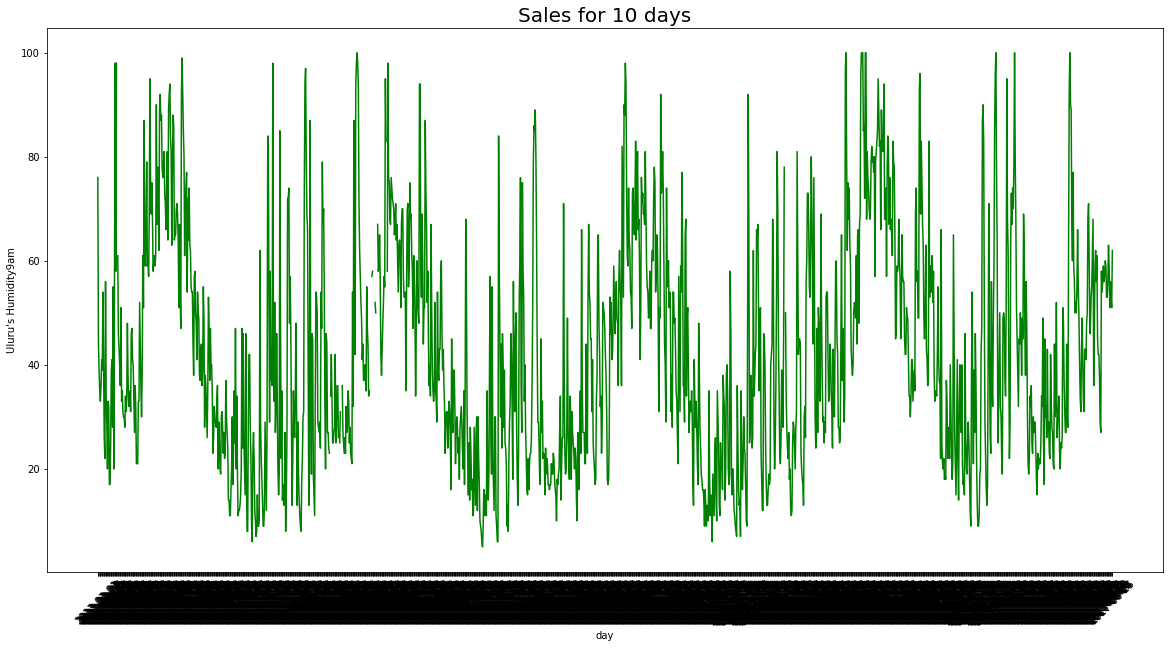

In [13]:
# matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
# fig.set_facecolor('white')
# ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
plt.plot(weather[weather['Location'] == 'Uluru'].Date, 
        weather[weather['Location'] == 'Uluru'].Humidity9am, color='green')
plt.xticks(rotation=45) ## x축 눈금 라벨 설정 - 40도 회전 
plt.title('Sales for 10 days',fontsize=20) ## 타이틀 설정
plt.xlabel('day')
plt.ylabel('Uluru\'s Humidity9am')
plt.show()

In [14]:
corr_df = weather.corr()
corr_df = corr_df.apply(lambda x: round(x ,2))
corr_df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.00,0.74,0.10,0.47,0.07,0.18,0.18,0.18,-0.23,0.01,-0.45,-0.46,0.08,0.02,0.90,0.71
MaxTemp,0.74,1.00,-0.07,0.59,0.47,0.07,0.01,0.05,-0.50,-0.51,-0.33,-0.43,-0.29,-0.28,0.89,0.98
Rainfall,0.10,-0.07,1.00,-0.06,-0.23,0.13,0.09,0.06,0.22,0.26,-0.17,-0.13,0.20,0.17,0.01,-0.08
Evaporation,0.47,0.59,-0.06,1.00,0.37,0.20,0.19,0.13,-0.50,-0.39,-0.27,-0.29,-0.18,-0.18,0.55,0.57
Sunshine,0.07,0.47,-0.23,0.37,1.00,-0.03,0.01,0.05,-0.49,-0.63,0.04,-0.02,-0.68,-0.70,0.29,0.49
WindGustSpeed,0.18,0.07,0.13,0.20,-0.03,1.00,0.61,0.69,-0.22,-0.03,-0.46,-0.41,0.07,0.11,0.15,0.03
WindSpeed9am,0.18,0.01,0.09,0.19,0.01,0.61,1.00,0.52,-0.27,-0.03,-0.23,-0.18,0.03,0.05,0.13,0.00
WindSpeed3pm,0.18,0.05,0.06,0.13,0.05,0.69,0.52,1.00,-0.15,0.02,-0.30,-0.26,0.05,0.03,0.16,0.03
Humidity9am,-0.23,-0.50,0.22,-0.50,-0.49,-0.22,-0.27,-0.15,1.00,0.67,0.14,0.19,0.45,0.36,-0.47,-0.50
Humidity3pm,0.01,-0.51,0.26,-0.39,-0.63,-0.03,-0.03,0.02,0.67,1.00,-0.03,0.05,0.52,0.52,-0.22,-0.56


# 2016, 2017년도를 test
# 2015년도를 val
# 2008~ 2014년도를 train

### 1) 지속적으로 포트폴리오 프로젝트를 수행하세요
- 지속적으로 데이터를 랭글링 하고 추가적인 시각화 결과를 만드세요
- 작성한 코드마다 적절한 코멘트를 추가하세요
- 모델을 학습시키고 베이스라인 모델과 비교해 보세요
- **포트폴리오 프로젝트의 베이스라인 모델이 무엇인지 한 문장으로 설명하세요.** 

In [15]:
### 이곳에서 과제를 진행해 주세요 ### 

In [16]:
###이곳에서 과제를 진행해 주세요 ###

### 2) Xgboost를 사용해 학습하고 기존 모델과 비교해 보세요.
- 본인 포트폴리오 데이터를 Xgboost로 학습하여 기존에 만들었던 모델과 비교합니다.
- **breast cancer 데이터를 Xgboost로 학습하고 f1 score를 제출하세요.(test 데이터에서 0.95이상)**

In [17]:
### (본인 포트폴리오 과제) 이곳에서 과제를 진행해 주세요 ### 

In [49]:
### 이곳에서 과제를 진행해 주세요 ###

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer 

cancer_dataset = load_breast_cancer()

for i,name in enumerate(cancer_dataset.feature_names):
    print('%02d : %s' %(i,name)) # 0을 안붙이면 앞에 0을 안붙이고, 02를 안붙이면 숫자를 앞으로 땡겨쓴다.

features = pd.DataFrame(cancer_dataset.data, columns = cancer_dataset.feature_names)
target = pd.DataFrame(cancer_dataset.target)
df = pd.DataFrame(data=features, columns=cancer_dataset.feature_names)
df['target'] = target

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2)

print(X_train.shape, X_test.shape)
df.head(3)

00 : mean radius
01 : mean texture
02 : mean perimeter
03 : mean area
04 : mean smoothness
05 : mean compactness
06 : mean concavity
07 : mean concave points
08 : mean symmetry
09 : mean fractal dimension
10 : radius error
11 : texture error
12 : perimeter error
13 : area error
14 : smoothness error
15 : compactness error
16 : concavity error
17 : concave points error
18 : symmetry error
19 : fractal dimension error
20 : worst radius
21 : worst texture
22 : worst perimeter
23 : worst area
24 : worst smoothness
25 : worst compactness
26 : worst concavity
27 : worst concave points
28 : worst symmetry
29 : worst fractal dimension
(364, 30) (114, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [50]:
cancer_dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [51]:
features.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [52]:
df.isnull().sum() # 없음

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [53]:
df.duplicated().sum() # 없음

0

In [54]:
# !pip install category_encoders

In [55]:
from xgboost import XGBClassifier
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
# from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# from sklearn.pipeline import make_pipeline

from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer())),
    ('xgb', XGBClassifier(n_estimators=100, random_state=2, n_jobs=-1)) 
], verbose=1)

pipe.fit(X_train, y_train);

# pipe = make_pipeline(
#     OrdinalEncoder(),
#     SimpleImputer(strategy='median'),
#     XGBClassifier(n_estimators=200
#                   , random_state=2
#                   , n_jobs=-1
#                   , max_depth=7
#                   , learning_rate=0.2
#                  )
# )

pipe.fit(X_train, y_train);


[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing xgb, total=   0.1s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing xgb, total=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

In [56]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
y_pred = pipe.predict(X_val)
print('검증 정확도: ', accuracy_score(y_val, y_pred))

print(classification_report(y_pred, y_val))

검증 정확도:  0.989010989010989
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.98      1.00      0.99        57

    accuracy                           0.99        91
   macro avg       0.99      0.99      0.99        91
weighted avg       0.99      0.99      0.99        91



### 3) Permutation importances를 계산하고 다른 중요도 결과와 비교해 보세요
- 본인 포트폴리오 데이터를 사용해 만든 모델의 Permutation importances를 계산하세요.
- **breast cancer 데이터를 사용해 만든 모델의 Permutation importances를 계산하고 가장 높은 값을 가지는 특성의 이름을 제출하세요.**
    - eli5 PermutationImportance 사용
    - scoring = 'accuracy'
    - n_iter = 5
    - random_state = 2

In [57]:
### (본인 포트폴리오 과제) 이곳에서 과제를 진행해 주세요 ### 

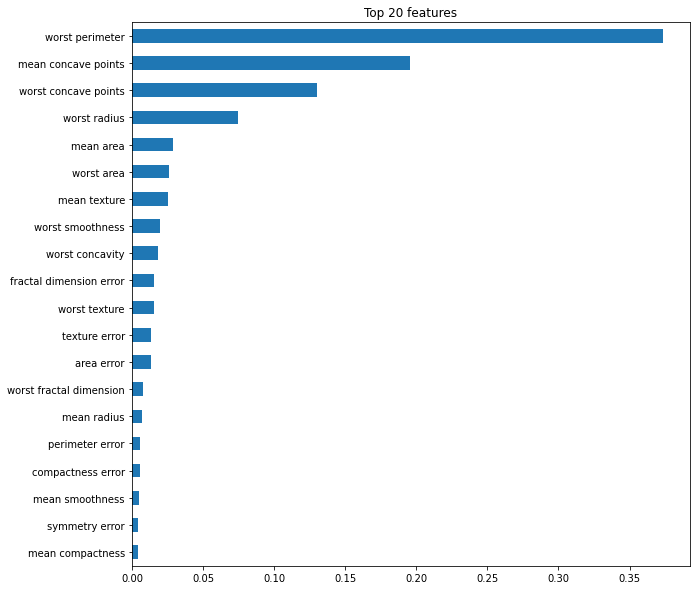

In [58]:
### 이곳에서 과제를 진행해 주세요 ###
# 특성 중요도
xgb = pipe.named_steps['xgb']
importances = pd.Series(xgb.feature_importances_, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();


In [59]:
# !pip install eli5

In [60]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import eli5
from eli5.sklearn import PermutationImportance
# permuter 정의
permuter = PermutationImportance(
    pipe.named_steps['xgb'], # model
    scoring='accuracy', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
X_val_transformed = pipe.named_steps['preprocessing'].transform(X_val)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val_transformed, y_val);

In [61]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

mean radius                0.000000
worst concavity            0.000000
worst compactness          0.000000
fractal dimension error    0.000000
symmetry error             0.000000
concave points error       0.000000
concavity error            0.000000
compactness error          0.000000
worst symmetry             0.000000
perimeter error            0.000000
texture error              0.000000
smoothness error           0.000000
mean fractal dimension     0.000000
mean perimeter             0.000000
radius error               0.000000
mean area                  0.000000
mean smoothness            0.000000
worst fractal dimension    0.000000
mean concavity             0.000000
mean symmetry              0.000000
mean compactness           0.000000
worst smoothness           0.002198
mean concave points        0.006593
mean texture               0.006593
worst radius               0.010989
worst perimeter            0.015385
worst area                 0.017582
worst concave points       0

## 🔥 도전과제

### 4) Xgboost 외에 다른 부스팅 라이브러리로 모델을 학습시켜 Xgboost와 비교해 보세요.

In [ ]:
### 이곳에서 과제를 진행해 주세요 ### 